In [3]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
games = pandas.read_csv("games.csv")

In [10]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


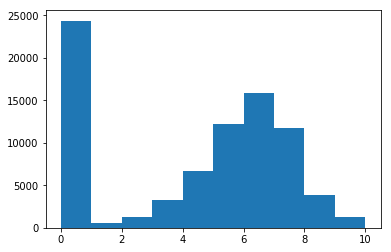

In [12]:
# make a histogram of the ratings using average_rating
plt.hist(games["average_rating"])
plt.show()

In [15]:
# print the first row of all games with zero score
print(games[games["average_rating"]==0].iloc[0])

#print the first row of all games with no zero score
print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

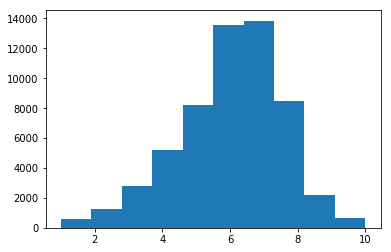

In [18]:
#remove any rows without user reviews
games = games[games["users_rated"]>0]

#remove any rows with missing values
games = games.dropna(axis= 0)

#make a histogram of average ratings
plt.hist(games["average_rating"])
plt.show()

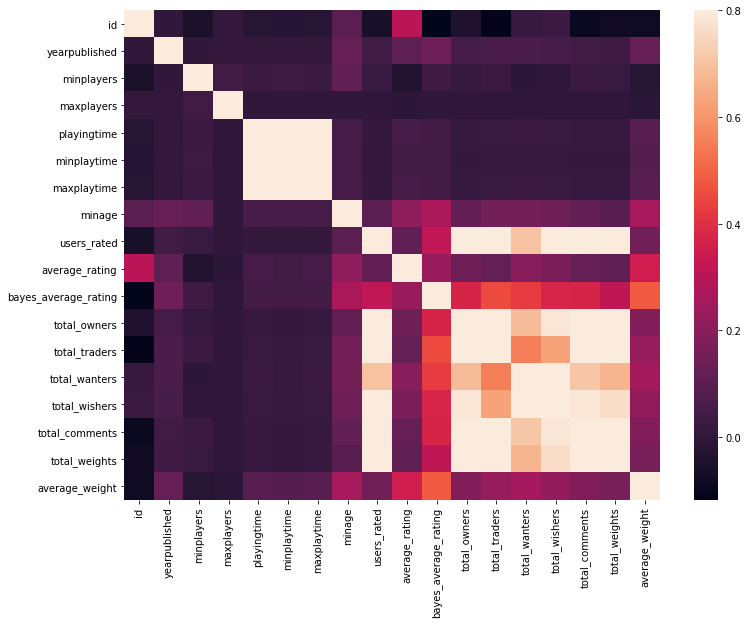

In [23]:
# Correlation matrix. We will use seaborn here
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat,vmax = 0.8,square = False)
plt.show()

In [24]:
# get all the columns from the dataframe
columns = games.columns.tolist()

#filter the columns to rmeove data that we dont want
columns = [c for c in columns if c not in["bayes_average_rating","average_rating","type","name","id"]]

#store the variable we'll be predicting on
target = "average_rating"

In [31]:
# generate train and test datasets
from sklearn.model_selection import train_test_split

# generate training set
train = games.sample(frac = 0.8,random_state = 1) #ie 80% of data as training

# select anything not in the training set and put it in test
test = games.loc[~games.index.isin(train.index)]
                     
# print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [33]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#Generate predictions for the test set
predictions = LR.predict(test[columns])

#Compute error between test predictions and actual values
mean_squared_error(predictions,test[target])

# a perfect score would have been 0 but it is not zero. We now use a random forest over the data to make predictions and check 
#which results better

2.0788190326293274

In [37]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

#Initialise the model
RFR = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 10,random_state = 1)

#fir to the data
RFR.fit(train[columns],train[target])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
# make predictions
predictions = RFR.predict(test[columns])

#compute the error between predicted and actual values
mean_squared_error(predictions,test[target])

1.4458564605687358

In [39]:
# Make predictions with both the models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))


#Print the predictions
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [40]:
test[target].iloc[0]

8.07933